In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
import os
import matplotlib.patches as mpatches


ERROR 1: PROJ: proj_create_from_database: Open of /nesi/project/niwa00018/queenle/ml_env_v2/share/proj failed


In [2]:
epoch = 215
error_df = pd.read_csv(f'temporal_exeriment_errors_epoch_{epoch}.csv').drop('Unnamed: 0',axis=1)


In [19]:
error_df = error_df[~error_df['emulator'].isin(['pr_ACCESS-CM2_1961-1980','pr_ACCESS-CM2_2015-2034','pr_ACCESS-CM2_2080-2099'])]

In [20]:
error_df

,GCM,emulator,framework,error period,var,metric,error type,whole region,land,ocean,sampling_n,model_type
0,ACCESS-CM2,pr_ACCESS-CM2_5,perfect,CC_signal,pr,annual_mean,MAE,11.170167,6.515695,11.575075,5,GAN
1,ACCESS-CM2,pr_ACCESS-CM2_5,imperfect,CC_signal,pr,annual_mean,MAE,10.267003,8.071394,10.458007,5,GAN
2,ACCESS-CM2,pr_ACCESS-CM2_5,perfect,1985_2004,pr,annual_mean,MAE,0.597953,0.889611,0.572580,5,GAN
3,ACCESS-CM2,pr_ACCESS-CM2_5,imperfect,1985_2004,pr,annual_mean,MAE,0.485343,0.793845,0.458505,5,GAN
4,ACCESS-CM2,pr_ACCESS-CM2_5,perfect,2080_2099,pr,annual_mean,MAE,0.747513,1.125210,0.714656,5,GAN
...,...,...,...,...,...,...,...,...,...,...,...,...
5827,EC-Earth3,pr_ACCESS-CM2_100,imperfect,CC_signal,pr,JJA_mean,RMSE,8.165935,7.696959,8.205466,100,unet
5828,EC-Earth3,pr_ACCESS-CM2_100,perfect,1985_2004,pr,JJA_mean,RMSE,1.247541,1.170423,1.254025,100,unet
5829,EC-Earth3,pr_ACCESS-CM2_100,imperfect,1985_2004,pr,JJA_mean,RMSE,1.337250,1.296621,1.340726,100,unet
5830,EC-Earth3,pr_ACCESS-CM2_100,perfect,2080_2099,pr,JJA_mean,RMSE,1.245997,1.273664,1.243561,100,unet


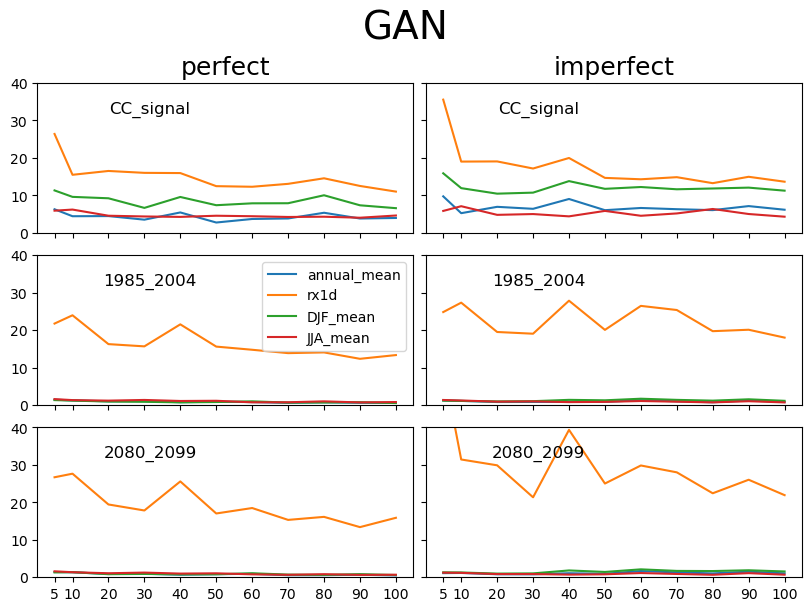

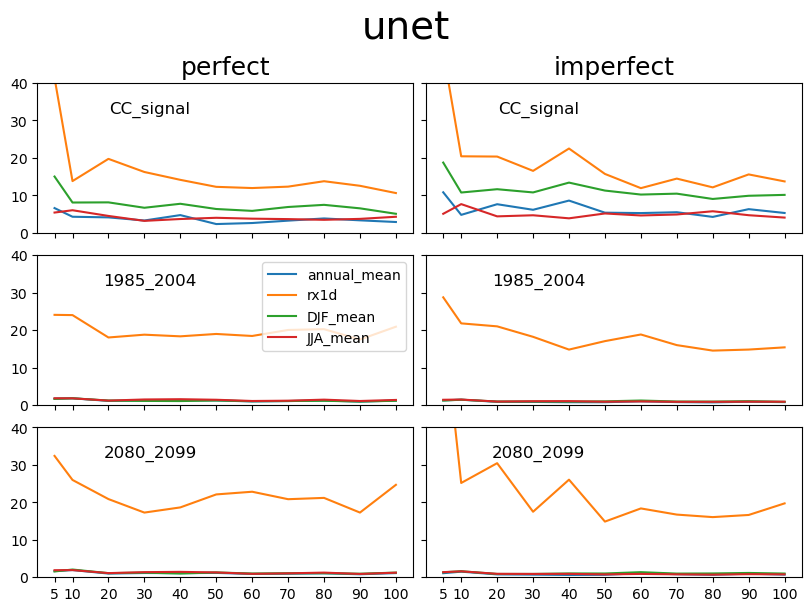

In [26]:

for model_type in ['GAN','unet']:
    
    df = error_df[error_df['model_type']==model_type]
    df = df[df['GCM']=='NorESM2-MM']
    
    fig,axs = plt.subplots(3,2,figsize=(8,6),sharex=True,sharey=True,layout='constrained')

    for i,error_period in enumerate(['CC_signal', '1985_2004', '2080_2099']):

        signal_df = df[df['error period']==error_period]

        for j,framework in enumerate(['perfect','imperfect']):

            if i == 0:
                axs[i][j].set_title(framework,fontsize=18)

            axs[i][j].text(0.3,0.8,f'{error_period}',transform=axs[i][j].transAxes,ha='center',fontsize=12)

            framework_df = signal_df[signal_df['framework']==framework]

            for metric in ['annual_mean','rx1d','DJF_mean','JJA_mean']:

                results = framework_df[framework_df['metric']==metric]
                if error_period == 'CC_signal':
                    results = results[results['error type']=='MAE'][['emulator','land']]
                else:
                    results = results[results['error type']=='RMSE'][['emulator','land']]
                
                

                samplings = []
                for em in results['emulator']:
                    samplings.append(em.split('_')[-1])

                results['sampling'] = samplings

                x = [int(v) for v in results['sampling']]
                axs[i][j].plot(x,results['land'],label=metric)

                if i == 2:
                    axs[i][j].set_xticks(x,labels=results['sampling'])

                axs[i][j].set_ylim(0,40)


    axs[1][0].legend()
    fig.suptitle(model_type,fontsize=28)

    #plt.savefig(f'temporal_sampling_errors_{model_type}.png',dpi=300)

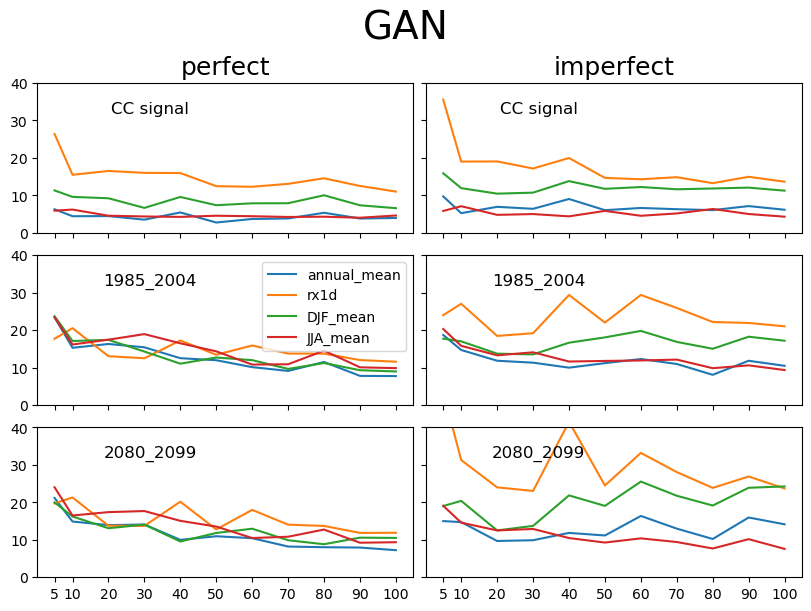

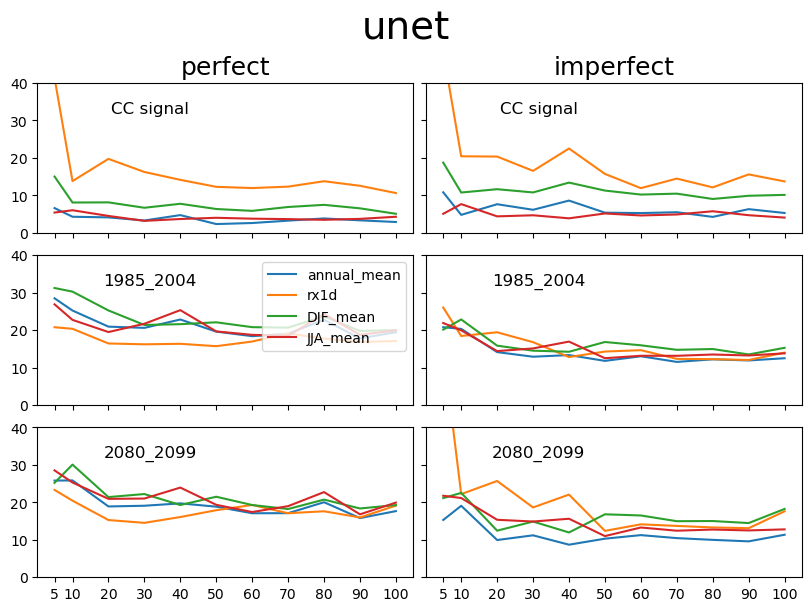

In [4]:

for model_type in ['GAN','unet']:
    
    df = error_df[error_df['model_type']==model_type]
    df = df[df['GCM']=='NorESM2-MM']
    
    fig,axs = plt.subplots(3,2,figsize=(8,6),sharex=True,sharey=True,layout='constrained')

    for i,error_period in enumerate(['CC signal', '1985_2004', '2080_2099']):

        signal_df = df[df['error period']==error_period]

        for j,framework in enumerate(['perfect','imperfect']):

            if i == 0:
                axs[i][j].set_title(framework,fontsize=18)

            axs[i][j].text(0.3,0.8,f'{error_period}',transform=axs[i][j].transAxes,ha='center',fontsize=12)

            framework_df = signal_df[signal_df['framework']==framework]

            for metric in ['annual_mean','rx1d','DJF_mean','JJA_mean']:

                results = framework_df[framework_df['metric']==metric][['emulator','land']]

                samplings = []
                for em in results['emulator']:
                    samplings.append(em.split('_')[-1])

                results['sampling'] = samplings

                x = [int(v) for v in results['sampling']]
                axs[i][j].plot(x,results['land'],label=metric)

                if i == 2:
                    axs[i][j].set_xticks(x,labels=results['sampling'])

                axs[i][j].set_ylim(0,40)

    axs[1][0].legend()
    fig.suptitle(model_type,fontsize=28)

    #plt.savefig(f'temporal_sampling_errors_{model_type}.png',dpi=300)

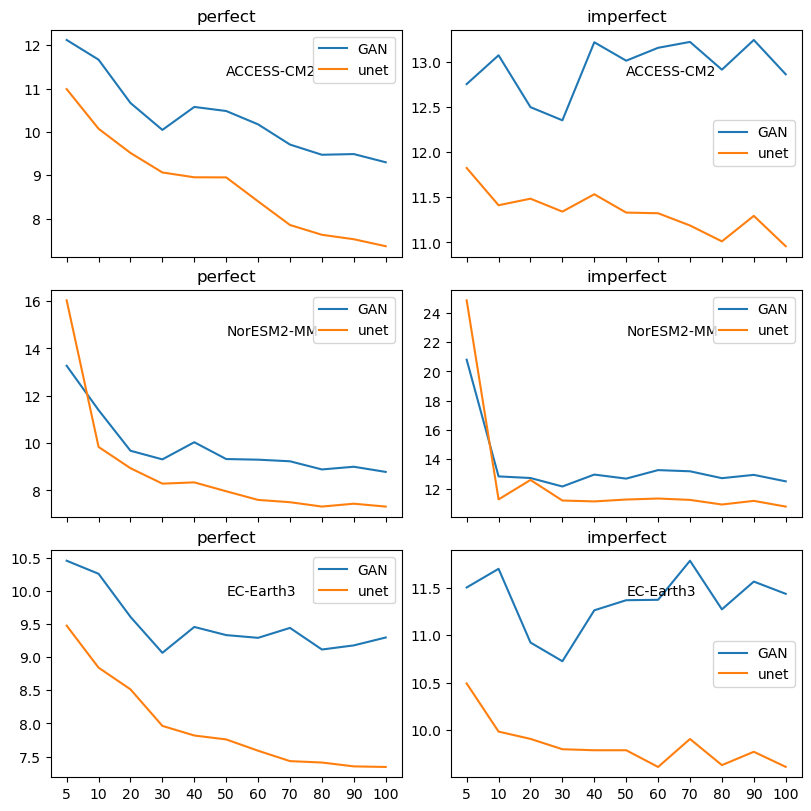

In [76]:

fig,axs = plt.subplots(3,2,figsize=(8,8),sharex=True,sharey=False,layout='constrained')

for i,gcm in enumerate(['ACCESS-CM2','NorESM2-MM','EC-Earth3']):
    
    rmse_df = pd.read_csv(f'../rmse_{gcm}.csv')
    
    for j,framework in enumerate(['perfect','imperfect']):

        framework_df = rmse_df[rmse_df['framework']==framework]

        for model_type in ['GAN','unet']:

            df = framework_df[framework_df['model_type']==model_type]

            results = df[['emulator','land']]

            samplings = []
            for em in results['emulator']:
                samplings.append(em.split('_')[-1])

            axs[i][j].plot(samplings,results['land'],label=model_type)

        axs[i][j].set_title(framework)
        axs[i][j].legend()
        axs[i][j].text(0.5,0.8,gcm,transform=axs[i][j].transAxes)

    #plt.savefig(f'temporal_sampling_errors_{model_type}.png',dpi=300)

In [5]:
gcm = 'ACCESS-CM2'
rmse_df = pd.read_csv(f'../rmse_{gcm}.csv')

In [6]:
rmse_df

,GCM,emulator,framework,error period,var,metric,whole region,land,ocean,model_type
0,ACCESS-CM2,pr_ACCESS-CM2_5,perfect,1965/1998/2034/2065/2097,pr,rmse,8.465911,12.119934,8.070187,GAN
1,ACCESS-CM2,pr_ACCESS-CM2_5,imperfect,1965/1998/2034/2065/2097,pr,rmse,8.990593,12.751584,8.585869,GAN
2,ACCESS-CM2,pr_ACCESS-CM2_10,perfect,1965/1998/2034/2065/2097,pr,rmse,8.707730,11.665574,8.401325,GAN
3,ACCESS-CM2,pr_ACCESS-CM2_10,imperfect,1965/1998/2034/2065/2097,pr,rmse,10.388342,13.069952,10.121524,GAN
4,ACCESS-CM2,pr_ACCESS-CM2_20,perfect,1965/1998/2034/2065/2097,pr,rmse,7.863765,10.666623,7.571033,GAN
5,ACCESS-CM2,pr_ACCESS-CM2_20,imperfect,1965/1998/2034/2065/2097,pr,rmse,9.078779,12.496198,8.718379,GAN
6,ACCESS-CM2,pr_ACCESS-CM2_30,perfect,1965/1998/2034/2065/2097,pr,rmse,7.712315,10.045821,7.474952,GAN
7,ACCESS-CM2,pr_ACCESS-CM2_30,imperfect,1965/1998/2034/2065/2097,pr,rmse,9.152991,12.350802,8.820155,GAN
8,ACCESS-CM2,pr_ACCESS-CM2_40,perfect,1965/1998/2034/2065/2097,pr,rmse,7.948430,10.575600,7.677495,GAN
9,ACCESS-CM2,pr_ACCESS-CM2_40,imperfect,1965/1998/2034/2065/2097,pr,rmse,9.706465,13.213762,9.339284,GAN


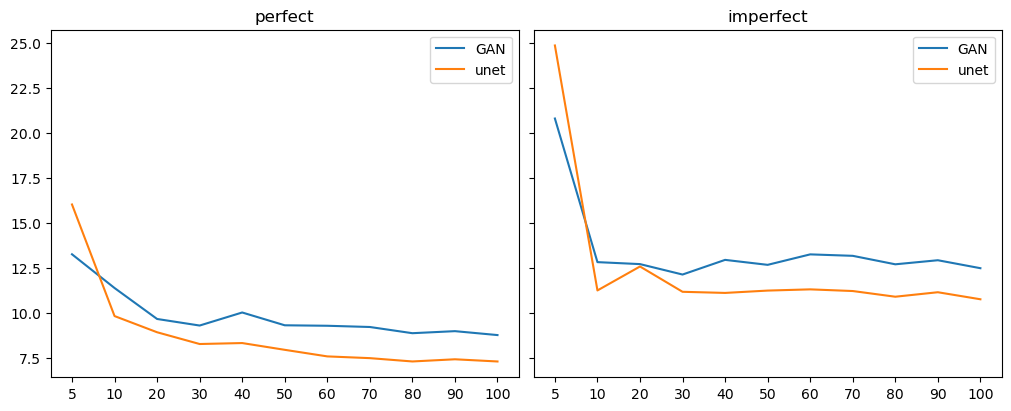

In [62]:
rmse_df = pd.read_csv('../rmse_NorESM2-MM.csv')

fig,axs = plt.subplots(1,2,figsize=(10,4),sharex=True,sharey=True,layout='constrained')

for i,framework in enumerate(['perfect','imperfect']):

    framework_df = rmse_df[rmse_df['framework']==framework]

    for model_type in ['GAN','unet']:

        df = framework_df[framework_df['model_type']==model_type]

        results = df[['emulator','land']]

        samplings = []
        for em in results['emulator']:
            samplings.append(em.split('_')[-1])

        axs[i].plot(samplings,results['land'],label=model_type)
        
    axs[i].set_title(framework)
    axs[i].legend()

#plt.savefig(f'temporal_sampling_errors_{model_type}.png',dpi=300)

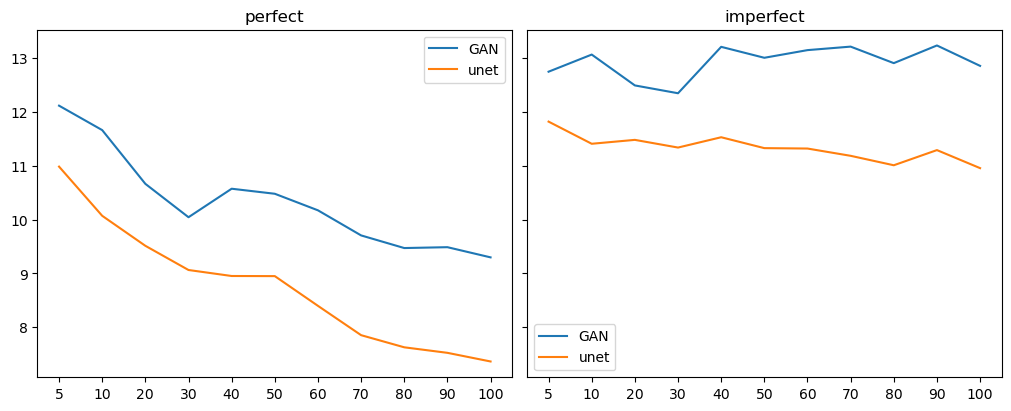

In [63]:
rmse_df = pd.read_csv('../rmse_ACCESS-CM2.csv')

fig,axs = plt.subplots(1,2,figsize=(10,4),sharex=True,sharey=True,layout='constrained')

for i,framework in enumerate(['perfect','imperfect']):

    framework_df = rmse_df[rmse_df['framework']==framework]

    for model_type in ['GAN','unet']:

        df = framework_df[framework_df['model_type']==model_type]

        results = df[['emulator','land']]

        samplings = []
        for em in results['emulator']:
            samplings.append(em.split('_')[-1])

        axs[i].plot(samplings,results['land'],label=model_type)
        
    axs[i].set_title(framework)
    axs[i].legend()

#plt.savefig(f'temporal_sampling_errors_{model_type}.png',dpi=300)